# Sample Lya posterior as a function of nuisance parameters

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import sys
import os
import json
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 120
mpl.rcParams['figure.dpi'] = 120
import cProfile
import emcee
import corner
# our own modules
import mf_emulator
import data_MPGADGET
import simplest_emulator
import linear_emulator
import gp_emulator
import data_PD2013
import mean_flux_model
import thermal_model
import pressure_model
import lya_theory
import likelihood
import emcee_sampler

### Setup Lya likelihood function

In [2]:
# read P1D measurement
#data=data_PD2013.P1D_PD2013(blind_data=True,zmin=2.1,zmax=4.7)
data=data_MPGADGET.P1D_MPGADGET(filename="1024_L90_mimic.json",z_list=[2.0,3.0,4.0])
zs=data.z

In [3]:
#basedir='../../p1d_emulator/sim_suites/emulator_512_18062019/'
#basedir='../../p1d_emulator/sim_suites/emulator_512_17052019/'
basedir='../../p1d_emulator/sim_suites/emulator_256_15072019/'
kmax_Mpc=4.0
p1d_label=None
skewers_label='Ns256_wM0.05'
undersample_z=1
max_arxiv_size=2000
paramList=["Delta2_p","n_p","mF","sigT_Mpc","gamma","kF_Mpc"]
emu_type='mf'
if emu_type=='polyfit':
    emu=gp_emulator.GPEmulator(basedir,p1d_label,skewers_label,
                                undersample_z=undersample_z,max_arxiv_size=max_arxiv_size,emu_type=emu_type,
                                kmax_Mpc=kmax_Mpc,verbose=False,paramList=paramList,train=True)
elif emu_type=='k_bin':
    emu=gp_emulator.GPEmulator(basedir,p1d_label,skewers_label,
                               undersample_z=undersample_z,max_arxiv_size=max_arxiv_size,
                               verbose=False,paramList=paramList,train=True,emu_type=emu_type)
elif emu_type=='linear':
    # specify parameters to emulate
    emulate_slope=False
    emulate_growth=False
    emulate_running=False
    emulate_pressure=True
    emu=linear_emulator.LinearEmulator(basedir,p1d_label,skewers_label,kmax_Mpc=kmax_Mpc,
                                undersample_z=undersample_z,max_arxiv_size=max_arxiv_size,
                                emulate_slope=emulate_slope,emulate_running=emulate_running,
                                emulate_pressure=emulate_pressure,emulate_growth=emulate_growth,verbose=False)
elif emu_type=='NGP':
    emu=simplest_emulator.SimplestEmulator(basedir,p1d_label,skewers_label,
                                undersample_z=undersample_z,max_arxiv_size=max_arxiv_size,
                                verbose=False)
elif emu_type=='mf':
    emu=mf_emulator.MeanFluxEmulator(basedir,p1d_label,skewers_label,
                                kmax_Mpc=kmax_Mpc,emu_type='k_bin',
                                max_arxiv_size=None,
                                verbose=True,paramList=paramList,train=True)
else:
    raise ValueError('wrong emulator type '+emu_type)

0 0.05 0.0 <mf< 0.15000000000000002
1 0.15 0.04999999999999999 <mf< 0.25
2 0.25 0.15 <mf< 0.35
3 0.35 0.24999999999999997 <mf< 0.44999999999999996
4 0.44999999999999996 0.35 <mf< 0.5499999999999999
5 0.5499999999999999 0.44999999999999996 <mf< 0.6499999999999999
6 0.65 0.55 <mf< 0.75
7 0.75 0.65 <mf< 0.85
8 0.85 0.75 <mf< 0.95
9 0.95 0.85 <mf< 1.0
latin hyper-cube data {'param_space': {'Delta2_star': {'ip': 0, 'min_val': 0.25, 'max_val': 0.45, 'z_star': 3.0, 'kp_Mpc': 0.7, 'latex': '$\\Delta^2_\\star$'}, 'n_star': {'ip': 1, 'min_val': -2.35, 'max_val': -2.25, 'z_star': 3.0, 'kp_Mpc': 0.7, 'latex': '$n_\\star$'}, 'heat_amp': {'ip': 2, 'min_val': 0.3, 'max_val': 3.0, 'latex': '$H_A$'}, 'heat_slo': {'ip': 3, 'min_val': -1.5, 'max_val': 1.5, 'latex': '$H_S$'}, 'z_rei': {'ip': 4, 'min_val': 5.5, 'max_val': 16.0, 'latex': '$z_r$'}}, 'nsamples': 50, 'samples': {'0': [0.392, -2.319, 2.757, -0.4500000000000002, 11.905000000000001], '1': [0.268, -2.327, 1.0830000000000002, -1.41, 6.025], '2': [0

37 sample has sim params = [0.316, -2.261, 0.597, 1.17, 14.424999999999999]
simulation has 3 redshifts
undersample_z = 1
38 sample has sim params = [0.252, -2.321, 0.5429999999999999, -0.1499999999999999, 14.845]
simulation has 3 redshifts
undersample_z = 1
39 sample has sim params = [0.40800000000000003, -2.273, 1.7850000000000004, -0.33000000000000007, 10.434999999999999]
simulation has 3 redshifts
undersample_z = 1
40 sample has sim params = [0.42000000000000004, -2.317, 1.461, 0.6299999999999999, 7.915]
simulation has 3 redshifts
undersample_z = 1
41 sample has sim params = [0.336, -2.339, 2.4330000000000003, 0.9300000000000002, 8.965]
simulation has 3 redshifts
undersample_z = 1
42 sample has sim params = [0.348, -2.275, 1.569, 1.4699999999999998, 11.065000000000001]
simulation has 3 redshifts
undersample_z = 1
43 sample has sim params = [0.444, -2.309, 1.299, -1.0499999999999998, 13.795]
simulation has 3 redshifts
undersample_z = 1
44 sample has sim params = [0.43200000000000005,

 /home/font/anaconda3/lib/python3.6/site-packages/paramz/parameterized.py:61: RuntimeWarning:Don't forget to initialize by self.initialize_parameter()!


6750 initial entries
use 353/6750 entries
build emulator 1/10, <F>=0.150
Loading emulator using a specific arxiv, not the one set in basedir
Rescaled params to unity volume
Cannot load emulators with non-standard training data
will train GP emulator
Training GP on 353 points
Optimised
6750 initial entries
use 859/6750 entries
build emulator 2/10, <F>=0.250
Loading emulator using a specific arxiv, not the one set in basedir
Rescaled params to unity volume
Cannot load emulators with non-standard training data
will train GP emulator
Training GP on 859 points
Optimised
6750 initial entries
use 1221/6750 entries
build emulator 3/10, <F>=0.350
Loading emulator using a specific arxiv, not the one set in basedir
Rescaled params to unity volume
Cannot load emulators with non-standard training data
will train GP emulator
Training GP on 1221 points
Optimised
6750 initial entries
use 1409/6750 entries
build emulator 4/10, <F>=0.450
Loading emulator using a specific arxiv, not the one set in basedi

In [34]:
theory=lya_theory.LyaTheory(zs,emulator=emu)

Note: redshifts have been re-sorted (earliest first)


In [35]:
# specify free parameters in likelihood
#free_parameters=['ln_kF_0']
free_parameters=['ln_tau_0','ln_tau_1']
#free_parameters=['ln_tau_0','ln_tau_1','ln_gamma_0','ln_kF_0','T0_1','T0_2','T0_3']
min_kp_kms=0.003
like=likelihood.Likelihood(data=data,theory=theory,free_parameters=free_parameters,min_kp_kms=min_kp_kms,verbose=False)

In [36]:
sampler = emcee_sampler.EmceeSampler(like=like,verbose=True)

use input likelihood
setup with 20 walkers
set 20 walkers with 2 dimensions
done setting up sampler


In [37]:
for p in sampler.like.free_params:
    print(p.name,p.value,p.min_value,p.max_value)

ln_tau_0 -0.7945801724139945 -1.5 -0.5
ln_tau_1 3.18 2.5 3.8


### Run burn-in chains

In [38]:
sampler.like.go_silent()

In [39]:
sampler.run_burn_in(nsteps=100)

start burn-in, will do 100 steps
0 [0.50495905 0.48598584]
20 [0.55454184 0.43395245]
40 [0.56812531 0.55490157]
60 [0.57064821 0.61368787]
80 [0.57105826 0.60476136]
finished burn-in


### Run main chains

In [40]:
sampler.run_chains(nsteps=500)

0 [0.57162162 0.6100242 ]
20 [0.57170662 0.61125348]
40 [0.57216874 0.61797833]
60 [0.57241341 0.61101687]
80 [0.57297441 0.62873169]
100 [0.57350096 0.66478026]
120 [0.57323174 0.67928535]
140 [0.5732218  0.67959235]
160 [0.57346259 0.68129301]
180 [0.57342967 0.68479448]
200 [0.57328894 0.67323405]
220 [0.5735753  0.67929605]
240 [0.57368219 0.69038569]
260 [0.57367654 0.68355383]
280 [0.57369339 0.68456353]
300 [0.57386388 0.67814921]
320 [0.57375721 0.68139818]
340 [0.57389666 0.67548748]
360 [0.57372816 0.67381986]
380 [0.57374698 0.67322761]
400 [0.57387084 0.66569533]
420 [0.57386672 0.67933991]
440 [0.57376036 0.68332595]
460 [0.57385866 0.67869744]
480 [0.57411146 0.67640156]


In [41]:
print("Mean acceptance fraction: {0:.3f}".format(np.mean(sampler.sampler.acceptance_fraction)))

Mean acceptance fraction: 0.411


### Plot results in cube units (0 < x < 1)

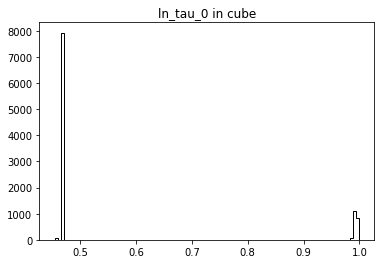

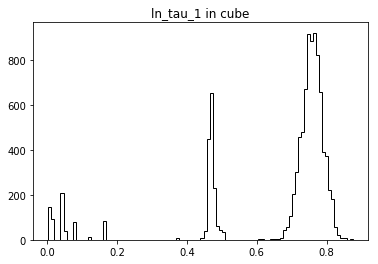

In [42]:
sampler.plot_histograms(cube=True)

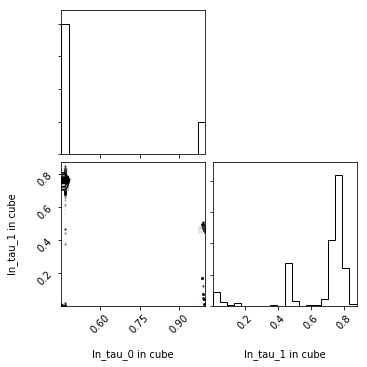

In [43]:
sampler.plot_corner(cube=True)

### Plot results for dimensional parameters

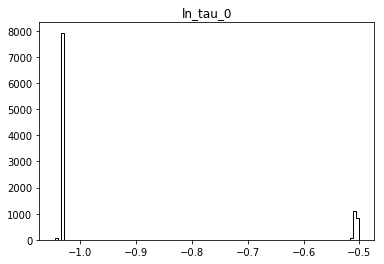

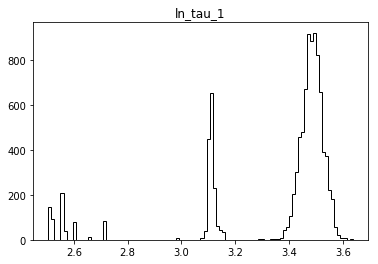

In [44]:
sampler.plot_histograms(cube=False)

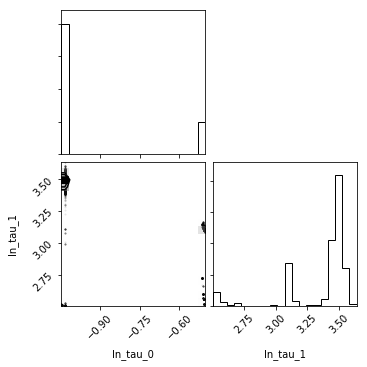

In [45]:
sampler.plot_corner(cube=False)

### Use likelihood object to make other useful plots

In [46]:
# get best fit model
ind = np.unravel_index(np.argmax(sampler.sampler.lnprobability, axis=None), sampler.sampler.lnprobability.shape)
best_fit=sampler.sampler.chain[ind]

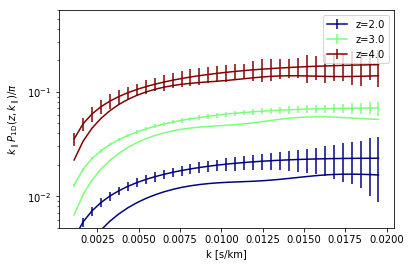

In [61]:
sampler.like.plot_p1d(values=best_fit,plot_every_iz=1)

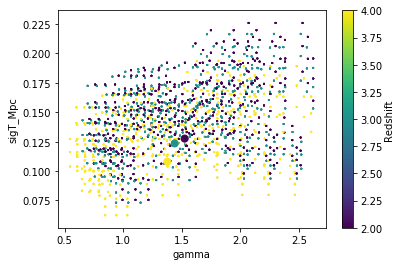

In [62]:
sampler.like.overplot_emulator_calls('gamma','sigT_Mpc',values=best_fit)

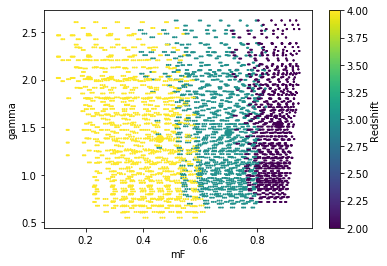

In [63]:
sampler.like.overplot_emulator_calls('mF','gamma',values=best_fit)

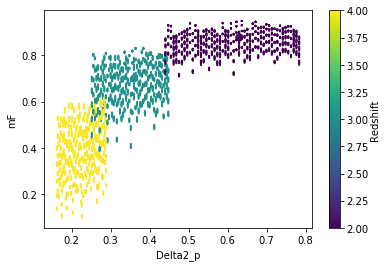

In [64]:
sampler.like.overplot_emulator_calls('Delta2_p','mF',values=best_fit)

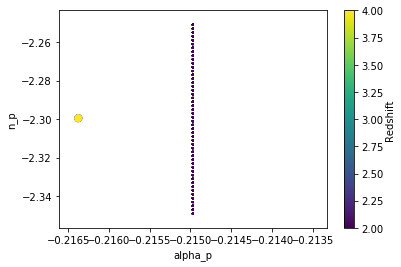

In [65]:
sampler.like.overplot_emulator_calls('alpha_p','n_p',values=best_fit)

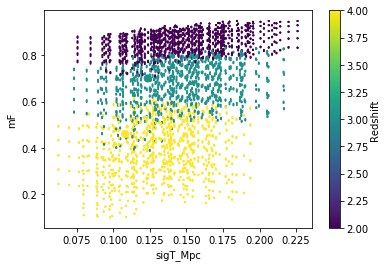

In [66]:
sampler.like.overplot_emulator_calls('sigT_Mpc','mF',values=best_fit)

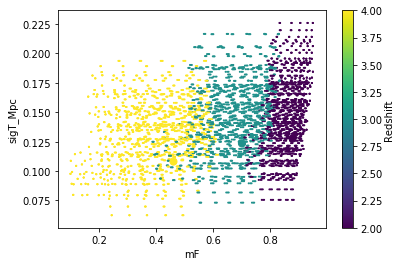

In [67]:
sampler.like.overplot_emulator_calls('mF','sigT_Mpc',values=best_fit)

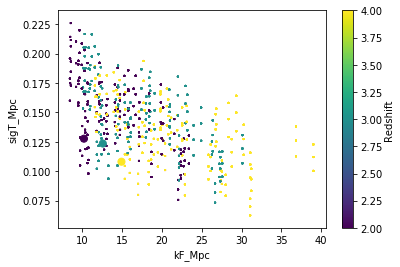

In [68]:
sampler.like.overplot_emulator_calls('kF_Mpc','sigT_Mpc',values=best_fit)

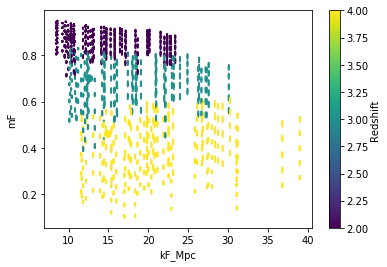

In [69]:
sampler.like.overplot_emulator_calls('kF_Mpc','mF',values=best_fit)

### Write chain to file for later use

In [70]:
chain_filename='test'
sampler.write_chain_to_file(chain_filename)

### Read pre-computed chain

In [71]:
new_sampler = emcee_sampler.EmceeSampler(emulator=emu,free_parameters=free_parameters,
                                         read_chain_file=chain_filename,verbose=True)

use default likelihood
Note: redshifts have been re-sorted (earliest first)
will read chain from file test
done setting up sampler


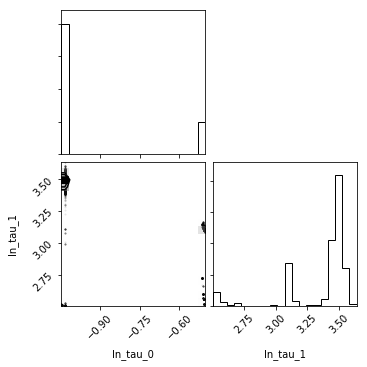

In [72]:
new_sampler.plot_corner(cube=False)

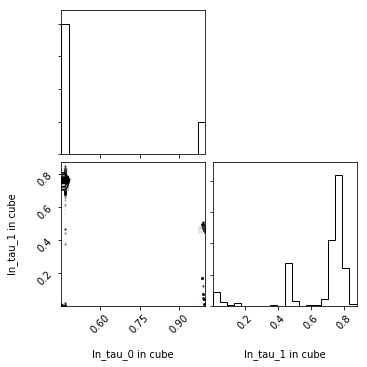

In [73]:
new_sampler.plot_corner(cube=True)

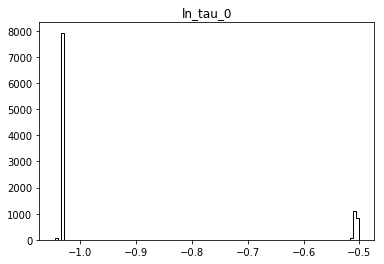

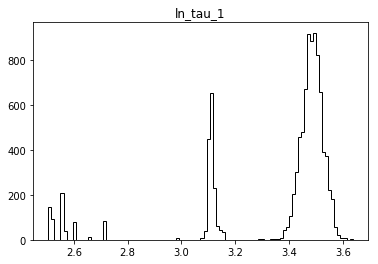

In [74]:
new_sampler.plot_histograms(cube=False)